In [22]:
import pandas as pd

In [23]:
df = pd.read_csv("D:\Machine Learning Projects\datasets\SaYoPillow.csv")

In [24]:
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [25]:
df.isnull().sum()

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

In [26]:
df.describe()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [27]:
df.dtypes

sr      float64
rr      float64
t       float64
lm      float64
bo      float64
rem     float64
sr.1    float64
hr      float64
sl        int64
dtype: object

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([126.,   0., 126.,   0.,   0., 126.,   0., 126.,   0., 126.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

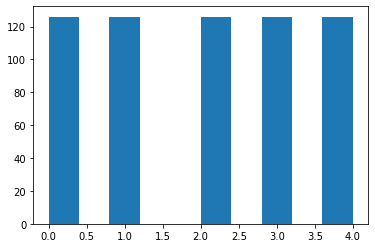

In [45]:
plt.hist(df.sl)

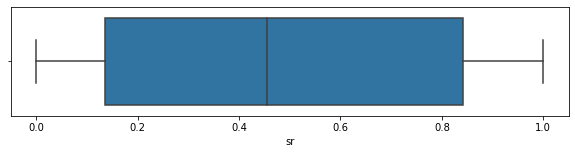

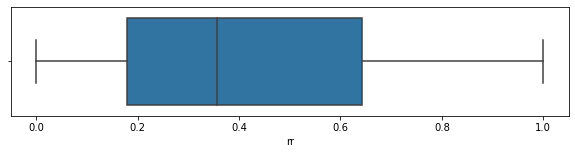

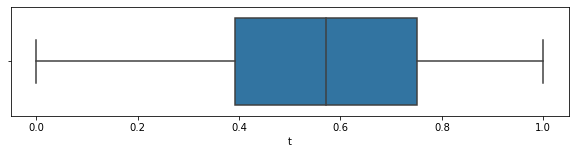

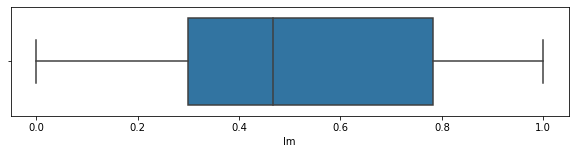

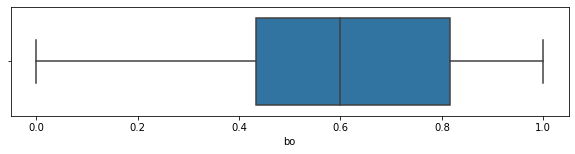

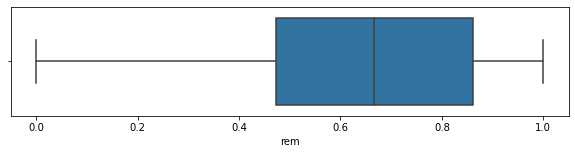

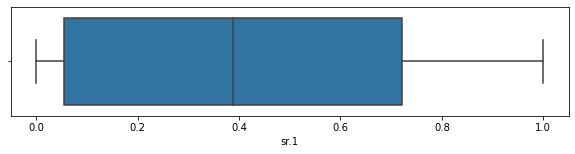

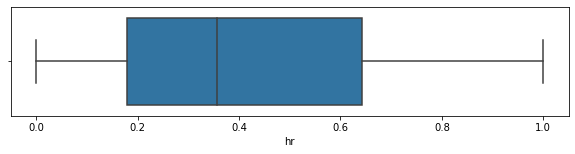

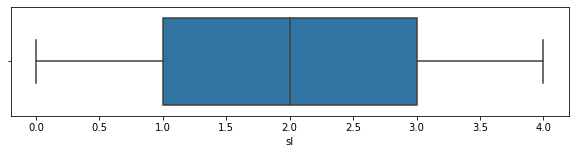

In [49]:
import seaborn as sn

for i in df.columns:
    plt.figure(figsize=(10,2))
    sn.boxplot(data=df, x=i)

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[(df.drop('sl',axis='columns')).columns] = scaler.fit_transform(df[(df.drop('sl',axis='columns')).columns])

In [31]:
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,0.887273,0.691429,0.488571,0.840000,0.522667,0.880000,0.204444,0.691429,3
1,0.848000,0.650286,0.468000,0.792000,0.503467,0.864000,0.172444,0.650286,3
2,0.272727,0.285714,0.785714,0.400000,0.866667,0.555556,0.777778,0.285714,1
3,0.741091,0.538286,0.412000,0.661333,0.451200,0.820444,0.085333,0.538286,3
4,0.056727,0.089143,0.919429,0.166400,0.949867,0.277333,0.916444,0.089143,0


In [32]:
df.sl.unique()

array([3, 1, 0, 2, 4], dtype=int64)

In [34]:
corr = df.corr()
corr['sl'].sort_values(ascending=True)

sr.1   -0.973036
t      -0.962354
bo     -0.961092
rem     0.951988
rr      0.963516
hr      0.963516
lm      0.971071
sr      0.975322
sl      1.000000
Name: sl, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split

X = df.drop('sl',axis='columns')
y = df.sl

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [37]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=30)
rnd_clf.fit(X_train,y_train)
rnd_clf.score(X_test,y_test)

0.9841269841269841

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
prediction = rnd_clf.predict(X_test)
prediction[:5]

array([2, 4, 3, 3, 0], dtype=int64)

In [42]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.95      1.00      0.98        21
           2       1.00      0.95      0.97        19
           3       1.00      0.96      0.98        27
           4       0.96      1.00      0.98        27

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



In [43]:
cm = confusion_matrix(y_test,prediction)

Text(69.0, 0.5, 'Truth')

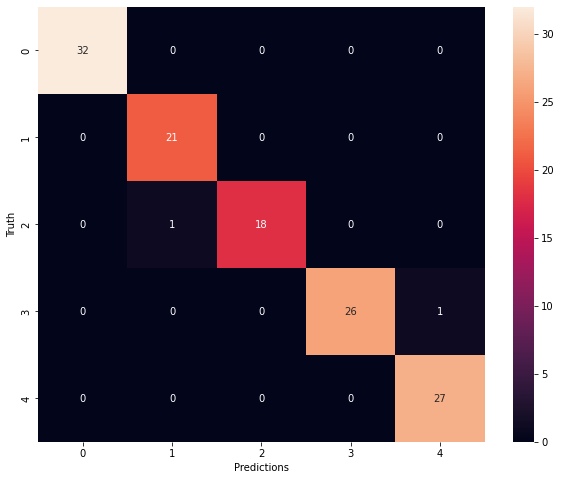

In [44]:
import seaborn as sn

plt.figure(figsize=(10,8))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")